In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
import random

# pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_parquet('data/final_full.parquet')
df.gender = df.gender.map({'M':1, 'F':0}).astype(int)

In [4]:
df[df.sepsis3 == 1]

,stay_id,cluster,subject_id,hadm_id,first_careunit,last_careunit,admission_type,admission_location,insurance,language,marital_status,race,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,creatinine_max_d1,bilirubin_max_d1,sofa_d1,respiration_d1,coagulation_d1,liver_d1,cardiovascular_d1,cns_d1,renal_d1,oasis_d1,oasis_prob_d1,preiculos_d1,preiculos_score_d1,gcs_d1,gcs_score_d1,heartrate_d1,heart_rate_score_d1,meanbp_d1,mbp_score_d1,resprate_d1,resp_rate_score_d1,temp_d1,temp_score_d1,urineoutput_d1,urineoutput_score_d1,mechvent_d1,mechvent_score_d1,electivesurgery_d1,electivesurgery_score_d1,pao2fio2ratio_novent_avg_d2,pao2fio2ratio_vent_avg_d2,rate_epinephrine_avg_d2,rate_norepinephrine_avg_d2,rate_dopamine_avg_d2,rate_dobutamine_avg_d2,platelet_min_d2,creatinine_max_d2,bilirubin_max_d2,sofa_d2,respiration_d2,coagulation_d2,liver_d2,cardiovascular_d2,cns_d2,renal_d2,oasis_d2,oasis_prob_d2,preiculos_d2,preiculos_score_d2,gcs_d2,gcs_score_d2,heartrate_d2,heart_rate_score_d2,meanbp_d2,mbp_score_d2,resprate_d2,resp_rate_score_d2,temp_d2,temp_score_d2,urineoutput_d2,urineoutput_score_d2,mechvent_d2,mechvent_score_d2,electivesurgery_d2,electivesurgery_score_d2,pao2fio2ratio_novent_avg_d3,pao2fio2ratio_vent_avg_d3,rate_epinephrine_avg_d3,rate_norepinephrine_avg_d3,rate_dopamine_avg_d3,rate_dobutamine_avg_d3,platelet_min_d3,creatinine_max_d3,bilirubin_max_d3,sofa_d3,respiration_d3,coagulation_d3,liver_d3,cardiovascular_d3,cns_d3,renal_d3,oasis_d3,oasis_prob_d3,preiculos_d3,preiculos_score_d3,gcs_d3,gcs_score_d3,heartrate_d3,heart_rate_score_d3,meanbp_d3,mbp_score_d3,resprate_d3,resp_rate_score_d3,temp_d3,temp_score_d3,urineoutput_d3,urineoutput_score_d3,mechvent_d3,mechvent_score_d3,electivesurgery_d3,electivesurgery_score_d3,sepsis3
0,30000646,4,12207593,22795209,1,1,3,2,0,0,1,3,1,1,43,2193,1,71.0,NaN,NaN,NaN,NaN,NaN,266.0,1.0,0.7,3,2.0,0.0,0.0,1.0,0.0,0.0,22,0.033259,1856.366667,1,15.0,0.0,102.0,1.0,42.0,3.0,38.0,6.0,39.11,2.0,4375.0,0.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,1,NaN,0.0,NaN,1.0,0.0,0.0,23,0.037612,1856.366667,1,15.0,0.0,113.0,3.0,56.0,2.0,32.0,6.0,37.00,2.0,5820.0,0.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.6,NaN,1,NaN,0.0,NaN,1.0,0.0,0.0,23,0.037612,1856.366667,1,15.0,0.0,119.0,3.0,61.0,2.0,31.0,6.0,36.890,2.0,4200.0,0.0,0,0,0,6,1
3,30003598,2,15332791,20683754,7,7,3,2,1,1,1,28,0,0,64,2189,0,NaN,302.000000,NaN,NaN,NaN,NaN,364.0,1.8,NaN,5,2.0,0.0,NaN,1.0,1.0,1.0,46,0.423212,59590.416667,2,14.0,3.0,112.0,3.0,52.0,2.0,31.0,6.0,35.83,4.0,790.0,5.0,1,9,0,6,NaN,238.000000,NaN,NaN,NaN,NaN,208.0,1.7,NaN,3,0.0,0.0,NaN,1.0,1.0,1.0,39,0.231102,59590.416667,2,14.0,3.0,122.0,3.0,54.0,2.0,34.0,6.0,38.17,2.0,3470.0,0.0,1,9,0,6,NaN,NaN,NaN,NaN,NaN,NaN,218.0,1.5,NaN,3,NaN,0.0,NaN,1.0,1.0,1.0,30,0.087098,59590.416667,2,14.0,3.0,112.0,3.0,58.0,2.0,33.0,6.0,37.560,2.0,2735.0,0.0,0,0,0,6,1
4,30004018,1,11101925,23920532,2,2,3,2,2,1,1,28,1,0,56,2158,1,NaN,462.500000,NaN,NaN,NaN,NaN,613.0,3.9,18.5,11,0.0,0.0,4.0,1.0,2.0,4.0,45,0.392432,95.000000,3,11.0,4.0,100.0,1.0,38.0,3.0,28.0,1.0,37.00,2.0,172.0,10.0,1,9,0,6,NaN,250.555556,NaN,0.065985,NaN,NaN,632.0,4.3,18.3,16,3.0,0.0,4.0,3.0,2.0,4.0,50,0.549933,95.000000,3,11.0,4.0,141.0,6.0,47.0,3.0,28.0,1.0,37.28,2.0,115.0,10.0,1,9,0,6,NaN,303.333333,NaN,NaN,NaN,NaN,658.0,5.2,18.7,14,3.0,0.0,4.0,1.0,2.0,4.0,45,0.392432,95.000000,3,11.0,4.0,104.0,1.0,28.0,3.0,28.0,1.0,37.440,2.0,255.0,10.0,1,9,0,6,1
5,33806430,3,11101925,23866136,2,2,3,2,2,1,1,28,0,0,56,2158,1,NaN,NaN,NaN,NaN,NaN,NaN,717.0,0.5,26.4,6,NaN,0.0,4.0,1.0,1.0,0.0,41,0.279468,1.233333,5,14.0,3.0,128.0,6.0,60.0,2.0,23.0,1.0,37.39,2.0,1445.0,1.0,1,9,0,6,NaN,NaN,NaN,NaN,NaN,NaN,751.0,0.5,30.9,6,NaN,0.0,4.0,1.0,1.0,0.0,34,0.137099,1.233333,5,14.0,3.0,130.0,6.0,84.0,0.0,30.0,1.0,37.33,2.0,965.0,5.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,688.0,0.4,28.2,6,NaN,0.0,4

In [5]:
df = df.drop(columns = ['stay_id', 'subject_id', 'hadm_id', 'sepsis3'])

In [6]:
df.columns

Index(['cluster', 'first_careunit', 'last_careunit', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'hospital_expire_flag',
       ...
       'resprate_d3', 'resp_rate_score_d3', 'temp_d3', 'temp_score_d3',
       'urineoutput_d3', 'urineoutput_score_d3', 'mechvent_d3',
       'mechvent_score_d3', 'electivesurgery_d3', 'electivesurgery_score_d3'],
      dtype='object', length=122)

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(df.drop(columns = ['hospital_expire_flag']), df['hospital_expire_flag'], test_size=0.2, random_state=42)

In [8]:
lgb = LGBMClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, \
                     random_state=2020, n_jobs=-1, objective='binary', metric='auc')

In [9]:
lgb.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, metric='auc',
               n_estimators=1000, objective='binary', random_state=2020,
               subsample=0.8)

In [10]:
y_test_pred = lgb.predict(X_test) 

accuracy_score(y_test, y_test_pred)

0.8607397504456328

In [11]:
y_test_pred_proba = lgb.predict_proba(X_test)[:,1]

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred_proba)

0.8545422407034049

In [13]:
df

,cluster,first_careunit,last_careunit,admission_type,admission_location,insurance,language,marital_status,race,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,creatinine_max_d1,bilirubin_max_d1,sofa_d1,respiration_d1,coagulation_d1,liver_d1,cardiovascular_d1,cns_d1,renal_d1,oasis_d1,oasis_prob_d1,preiculos_d1,preiculos_score_d1,gcs_d1,gcs_score_d1,heartrate_d1,heart_rate_score_d1,meanbp_d1,mbp_score_d1,resprate_d1,resp_rate_score_d1,temp_d1,temp_score_d1,urineoutput_d1,urineoutput_score_d1,mechvent_d1,mechvent_score_d1,electivesurgery_d1,electivesurgery_score_d1,pao2fio2ratio_novent_avg_d2,pao2fio2ratio_vent_avg_d2,rate_epinephrine_avg_d2,rate_norepinephrine_avg_d2,rate_dopamine_avg_d2,rate_dobutamine_avg_d2,platelet_min_d2,creatinine_max_d2,bilirubin_max_d2,sofa_d2,respiration_d2,coagulation_d2,liver_d2,cardiovascular_d2,cns_d2,renal_d2,oasis_d2,oasis_prob_d2,preiculos_d2,preiculos_score_d2,gcs_d2,gcs_score_d2,heartrate_d2,heart_rate_score_d2,meanbp_d2,mbp_score_d2,resprate_d2,resp_rate_score_d2,temp_d2,temp_score_d2,urineoutput_d2,urineoutput_score_d2,mechvent_d2,mechvent_score_d2,electivesurgery_d2,electivesurgery_score_d2,pao2fio2ratio_novent_avg_d3,pao2fio2ratio_vent_avg_d3,rate_epinephrine_avg_d3,rate_norepinephrine_avg_d3,rate_dopamine_avg_d3,rate_dobutamine_avg_d3,platelet_min_d3,creatinine_max_d3,bilirubin_max_d3,sofa_d3,respiration_d3,coagulation_d3,liver_d3,cardiovascular_d3,cns_d3,renal_d3,oasis_d3,oasis_prob_d3,preiculos_d3,preiculos_score_d3,gcs_d3,gcs_score_d3,heartrate_d3,heart_rate_score_d3,meanbp_d3,mbp_score_d3,resprate_d3,resp_rate_score_d3,temp_d3,temp_score_d3,urineoutput_d3,urineoutput_score_d3,mechvent_d3,mechvent_score_d3,electivesurgery_d3,electivesurgery_score_d3
0,4,1,1,3,2,0,0,1,3,1,1,43,2193,1,71.0,NaN,NaN,NaN,NaN,NaN,266.0,1.0,0.7,3,2.0,0.0,0.0,1.0,0.0,0.0,22,0.033259,1856.366667,1,15.0,0.0,102.0,1.0,42.0,3.0,38.0,6.0,39.11,2.0,4375.0,0.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,1,NaN,0.0,NaN,1.0,0.0,0.0,23,0.037612,1856.366667,1,15.0,0.0,113.0,3.0,56.0,2.0,32.0,6.0,37.000,2.0,5820.0,0.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.6,NaN,1,NaN,0.0,NaN,1.0,0.0,0.0,23,0.037612,1856.366667,1,15.0,0.0,119.0,3.0,61.0,2.0,31.0,6.0,36.89,2.0,4200.0,0.0,0,0,0,6
1,0,4,4,4,8,2,0,1,19,0,1,86,2184,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,1.0,0.0,31,0.097783,74.000000,3,13.0,4.0,107.0,3.0,98.0,0.0,27.0,1.0,36.39,2.0,850.0,5.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,171.0,1.1,1.1,1,NaN,0.0,0.0,0.0,1.0,0.0,29,0.077479,74.000000,3,13.0,4.0,100.0,1.0,85.5,0.0,27.0,1.0,37.280,2.0,750.0,5.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,1.0,0.0,31,0.097783,74.000000,3,13.0,4.0,108.0,3.0,82.5,0.0,29.0,1.0,37.22,2.0,850.0,5.0,0,0,0,6
2,0,2,2,4,6,2,1,3,27,0,1,55,2132,3,NaN,NaN,NaN,NaN,NaN,NaN,280.0,0.7,0.9,3,NaN,0.0,0.0,0.0,3.0,0.0,41,0.279468,510.416667,0,7.0,10.0,141.0,6.0,97.5,0.0,35.0,6.0,36.39,2.0,735.0,5.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,265.0,0.7,0.6,3,NaN,0.0,0.0,0.0,3.0,0.0,36,0.170145,510.416667,0,7.0,10.0,115.0,3.0,99.5,0.0,33.0,6.0,36.665,0.0,1255.0,5.0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,256.0,0.7,0.4,3,NaN,0.0,0.0,0.0,3.0,0.0,36,0.170145,510.416667,0,7.0,10.0,105.0,1.0,96.5,0.0,40.0,6.0,37.00,2.0,1060.0,5.0,0,0,0,6
3,2,7,7,3,2,1,1,1,28,0,0,64,2189,0,NaN,302.0,NaN,NaN,NaN,NaN,364.0,1.8,NaN,5,2.0,0.0,NaN,1.0,1.0,1.0,46,0.423212,59590.416667,2,14.0,3.0,112.0,3.0,52.0,2.0,31.0,6.0,35.83,4.0,790.0,5.0,1,9,0,6,NaN,238.000000,NaN,NaN,NaN,NaN,208.0,1.7,NaN,3,0.0,0.0,NaN,1.0,1.0,1.0,39,0.231102,59590.416667,2,14.0,3.0,122.0,3.0,54.0,2.0,34.0,6.0,38.170,2.0,3470.0,0.0,1,9,0,6,NaN,NaN,NaN,NaN,NaN,NaN,218.0,1.5,NaN,3,NaN,0.0,NaN,1.0,1.0,1.0,30,0.087098,59590.416667,2,14.0,3.0,112.0,3.0,58.0,2.0,33.0,6.0,37.56,2.0,2735.0,0.0,0,0,0,6
4,1,2,2,3,2,2,1,1,28,1,0,56,2158,1,NaN,462.5,NaN,NaN,NaN,NaN,613.0,3.9,18.5,11,0.0,0.

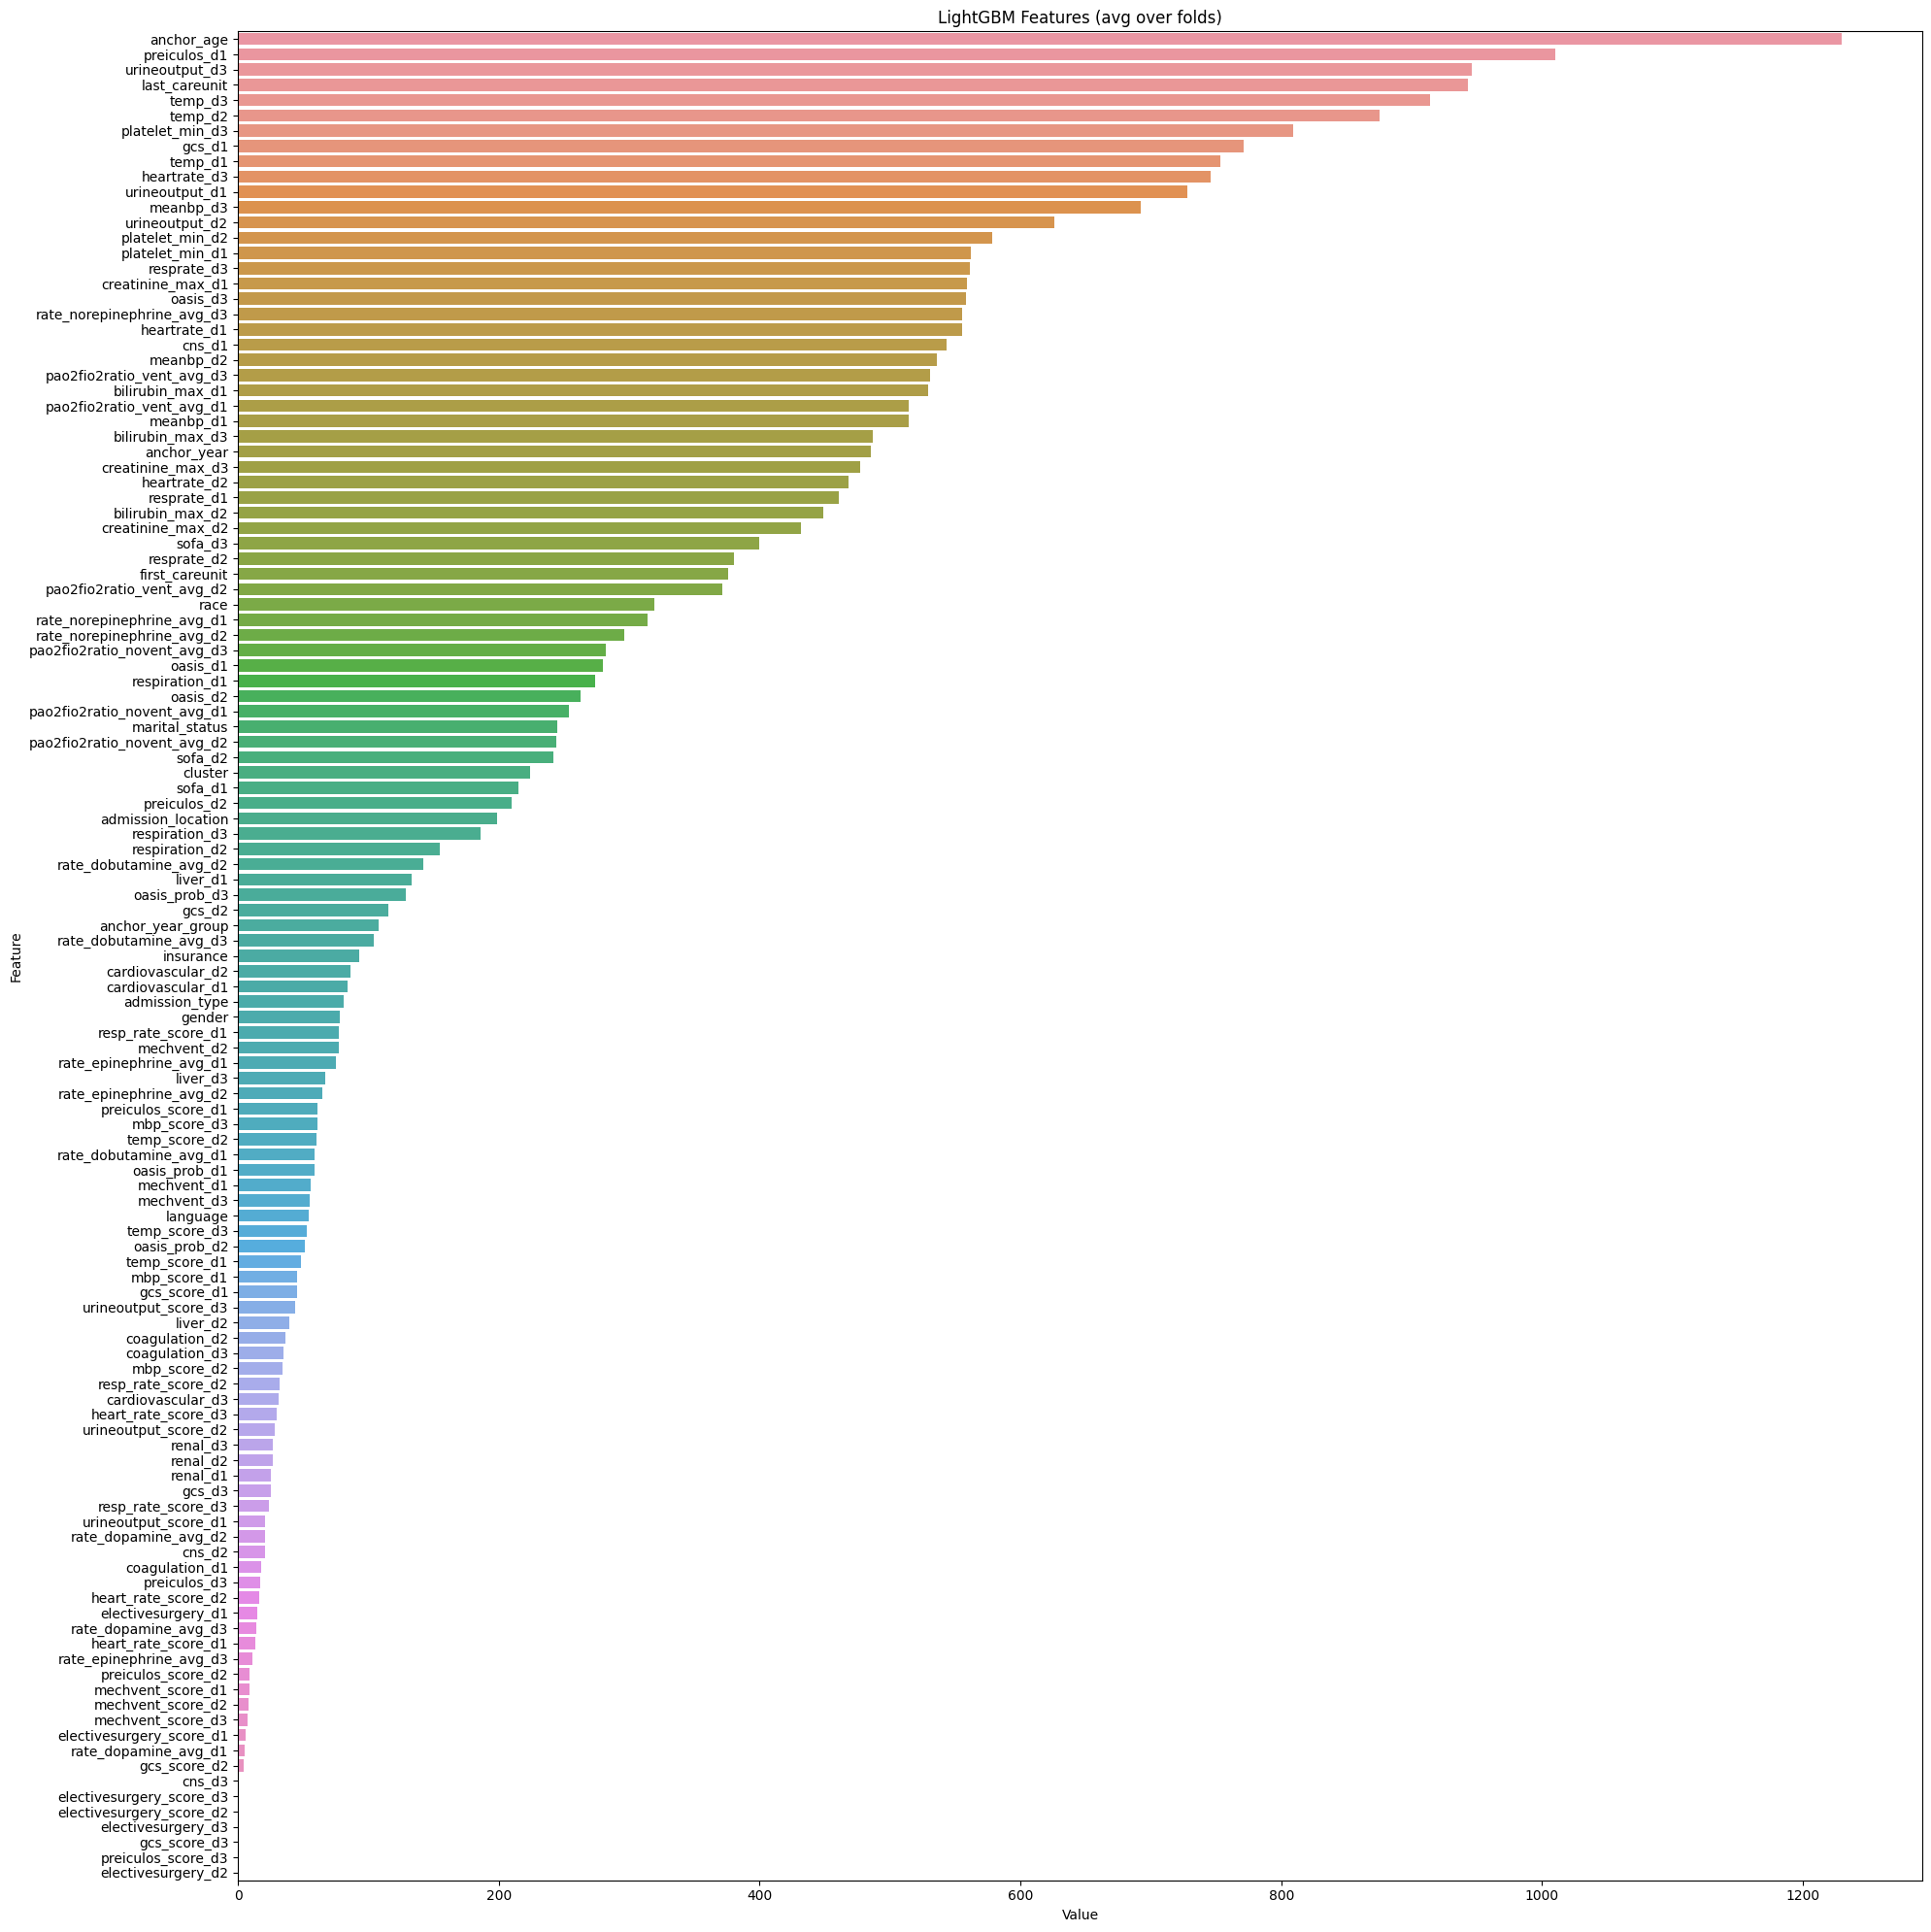

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()